Content Trends Analysis: Netflix Movies & TV Shows (EDA)

In [16]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Step 2: Load the dataset
df=pd.read_csv(r"C:\Users\Deepa nayak\OneDrive\Desktop\CodeAlpha\Task-2 (EDA)\netflix_titles.csv")

In [19]:
# Step 3: Preview the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


✅ Step 1: Basic Data Inspection

In [20]:
# View the first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
# Shape of the dataset
print("Dataset shape:", df.shape)

Dataset shape: (8807, 12)


In [22]:
# Column names
print("Columns:", df.columns.tolist())

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [23]:
# Summary of data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [24]:
# Count of missing values per column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [25]:
# Check for duplicate values
df.duplicated().sum()

0

In [26]:
# Basic statistics (only for numeric column 'release_year')
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


📊 Dataset Overview
Total Records: 8,807

Total Columns: 12

🧾 Column Breakdown
| Column Name    | Description                             | Missing Values |
| -------------- | --------------------------------------- | -------------- |
| `show_id`      | Unique ID for each show                 | 0              |
| `type`         | Type of content: *Movie* or *TV Show*   | 0              |
| `title`        | Title of the content                    | 0              |
| `director`     | Director(s) of the content              | 2,634 ❗       |
| `cast`         | Main cast                               | 825            |
| `country`      | Country of origin                       | 831            |
| `date_added`   | Date when added to Netflix              | 10             |
| `release_year` | Original release year                   | 0              |
| `rating`       | Age rating (e.g., TV-MA, PG-13)         | 4              |
| `duration`     | Duration (in minutes or seasons)        | 3              |
| `listed_in`    | Genre or category (e.g., Drama, Comedy) | 0              |
| `description`  | Summary of the show/movie               | 0              |


🛠 Data Types
Most columns are object (text), except:

release_year: int64

🚩 Initial Observations
Missing Data:

    *director and cast have a significant number of missing values.

    *country is also missing for nearly 10% of the entries.

Mixed Duration Format:

duration has values like “90 min” for movies and “2 Seasons” for TV Shows — needs cleaning if we want to analyze duration.

Content Split:

The dataset includes both Movies and TV Shows —can analyze them separately if needed.

✅ Step 2: Handle Missing Values

In [27]:
# Fill missing 'director', 'cast', 'country' with placeholders
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Mentioned', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Fill 'rating' and 'duration' with mode
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna(df['duration'].mode()[0], inplace=True)

# For 'date_added', since only 10 missing, we can drop those rows
df.dropna(subset=['date_added'], inplace=True)

# Confirm all missing values are handled
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

✅ Step 3: Ask Questions for Exploration

🎬 Content Overview

1) What is the total number of Movies vs. TV Shows?

2) How has the number of content releases changed over the years?

3) What are the top countries producing Netflix content?

4) What are the most frequent ratings (TV-MA, PG, etc.)?

📊 Category & Genre Analysis
1) What are the most common genres listed?

2) Which type of content dominates which genres — Movies or TV Shows?

3) Are certain ratings more common in Movies vs TV Shows?

🕰️ Time-based Trends
1) When were most titles added to Netflix (year/month)?

2) Is there a spike in content addition in specific years?

🌍 Geographic Analysis
1) Which countries are most featured in TV Shows vs Movies?

✅ Step 4:Start with Content Type Count (Q1)

🎬 Content Overview

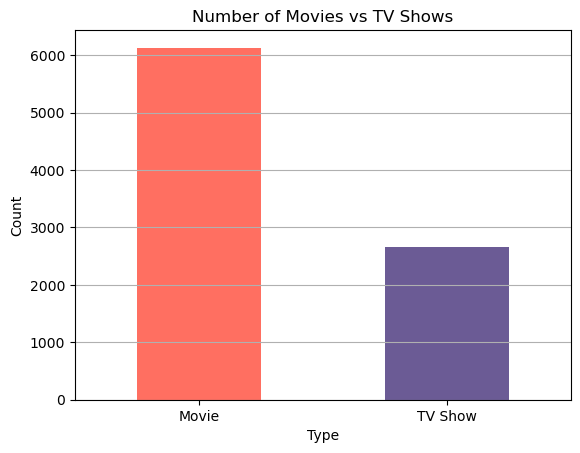

In [28]:
# Q1. Number of Movies vs TV Shows
df['type'].value_counts().plot(kind='bar', color=['#FF6F61','#6B5B95'])
plt.title('Number of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

📊 Insight 1: Content Type Distribution

    *Movies clearly dominate Netflix's content library, with over 6,000 titles.

    *TV Shows make up less than half that number (~2,500+ titles).

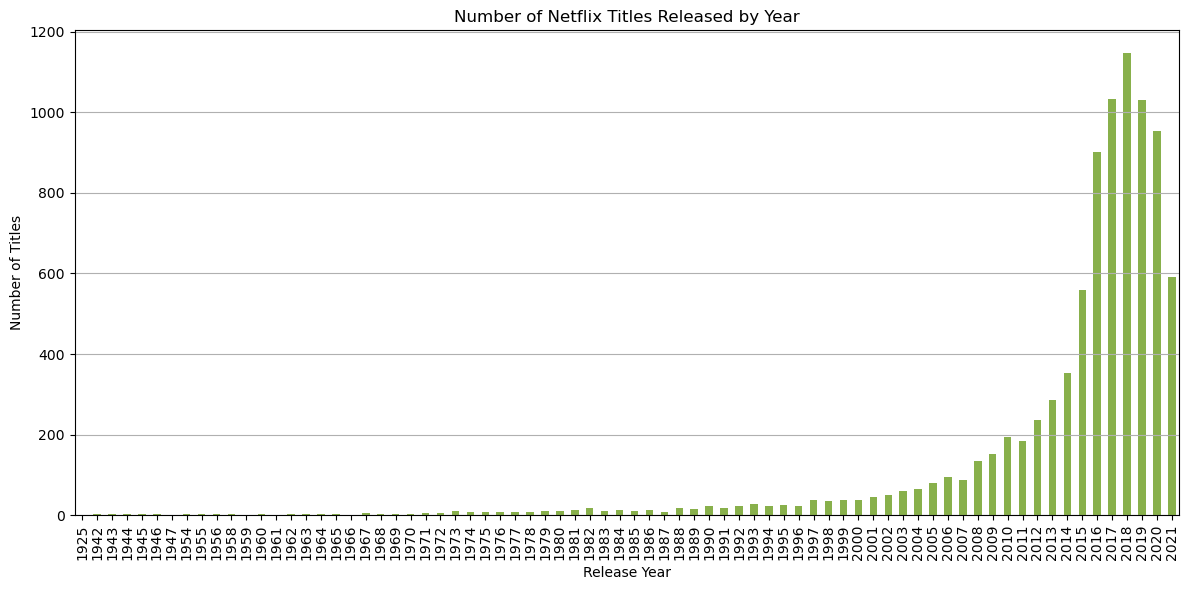

In [29]:
# Q2. Number of releases per year
plt.figure(figsize=(12,6))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='#88B04B')
plt.title('Number of Netflix Titles Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

📈 Insight 2: Netflix Content Release Trend

    *From the early 1900s to around 2010, content releases were minimal.

    *There’s a massive spike starting 2015–2019, indicating Netflix's global expansion and original content push.

    *The peak seems to be around 2018–2019, with over 1,000 titles released per year.

    *Slight dip in 2020–2021 — likely due to the COVID-19 pandemic affecting productions.

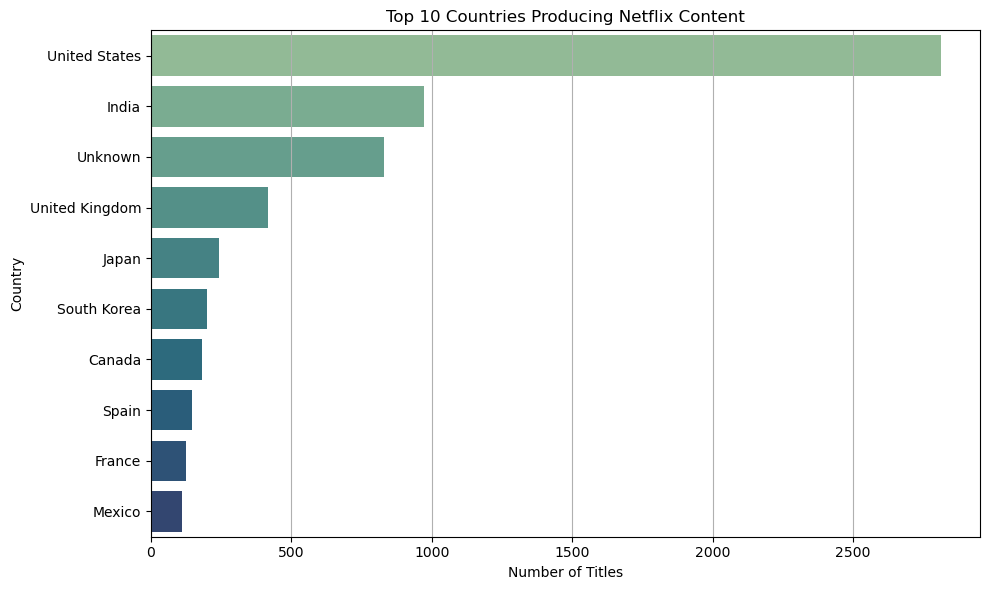

In [30]:
# Q3. Top 10 countries with most titles
top_countries = df['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


🌐 Insight 3: Top Content-Producing Countries on Netflix

    *United States is the dominant content contributor with over 2,500 titles, showing Netflix’s strong roots in Hollywood and U.S.-based production.

    *India ranks 2nd, reflecting Netflix’s massive push into the Indian market with regional shows and movies.

    *Unknown appears high due to missing data, but you've handled it smartly during cleaning.

    *United Kingdom, Japan, and South Korea are next — highlighting Netflix's investment in global content (especially K-dramas and anime).

    *Other contributors include Canada, Spain, France, and Mexico.

🎯 What This Tells Us:
    *Netflix is not just a U.S.-centric platform — it's becoming a truly global content provider, diversifying rapidly across Asia and Europe.

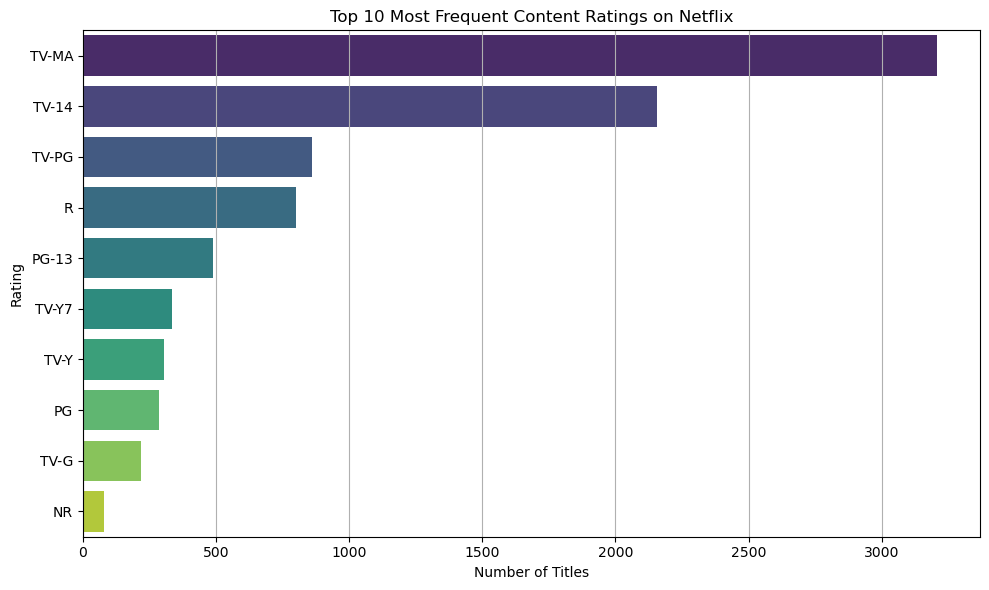

In [31]:
# Q4. Count of each rating
rating_counts = df['rating'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='viridis')
plt.title('Top 10 Most Frequent Content Ratings on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

🔒 Insight 4: Most Frequent Content Ratings
    *TV-MA (Mature Audience) is by far the most common rating on Netflix — over 3,000 titles!

    *TV-14 and TV-PG follow, showing a wide offering for teen and general audiences.

    *R and PG-13 rated content are also popular, mostly for movies.

    *Family-friendly ratings like TV-Y, TV-G, and TV-Y7 exist but make up a smaller share.

    *NR (Not Rated) is rare — possibly older or niche content.

💡 What This Tells Us:
    *Netflix heavily focuses on mature content — drama, thrillers, true crime, adult comedy — but still maintains a wide spread to cater to all age groups.

📊 Category & Genre Analysis

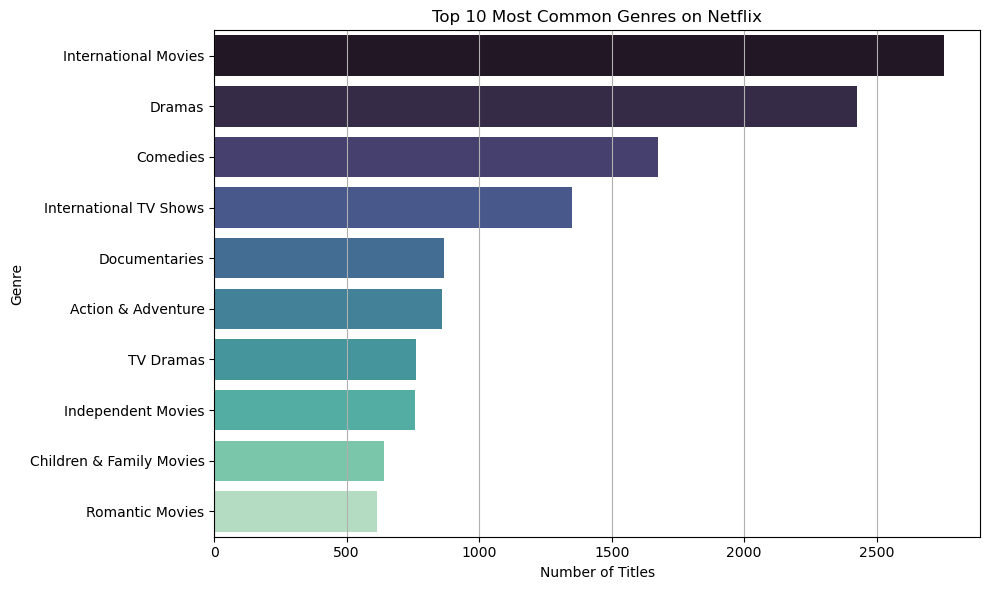

In [32]:
# Q1. Most common genres listed
# Split 'listed_in' into individual genres and flatten the list
from collections import Counter

# Flatten all genres into a single list
all_genres = df['listed_in'].str.split(', ').sum()

# Count frequency of each genre
genre_counts = Counter(all_genres).most_common(10)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='mako')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

🎭 Insight 5: Most Common Genres on Netflix
    *Dramas are the leading genre — a staple of Netflix’s global catalog.

    *Followed by Comedies, Documentaries, Action & Adventure, and International Shows.

This shows Netflix's strength in offering emotionally engaging, informative, and globally diverse content.

Genres like Children & Family, Romantic, and Thrillers are also highly popular.

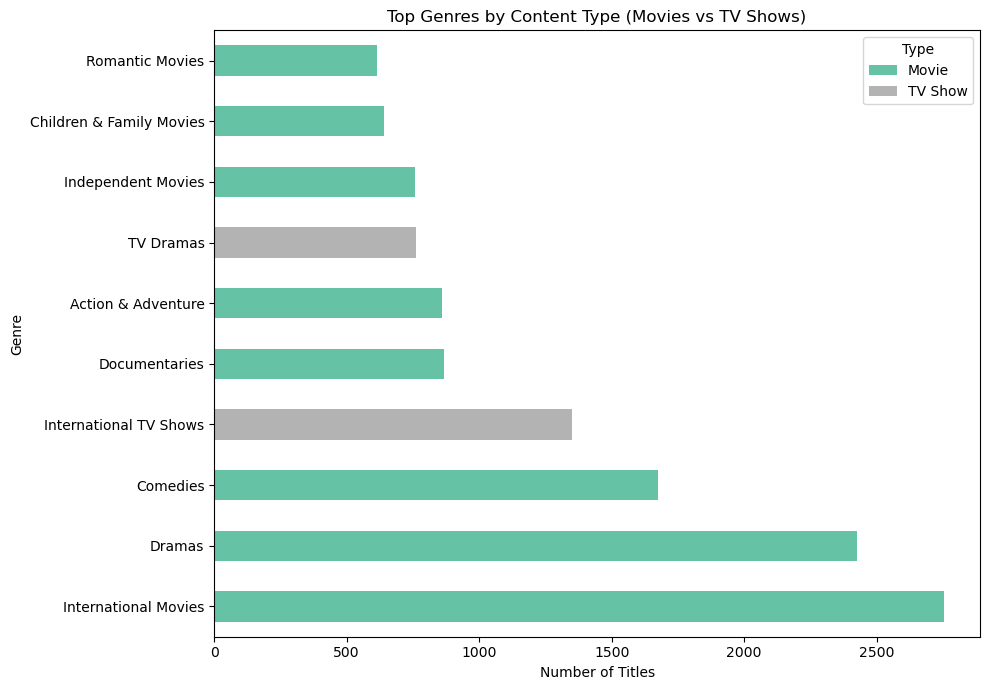

In [33]:
#Q2.Top genres by content type
# Create a new DataFrame by exploding genres for each row
genre_split = df.copy()
genre_split['genre'] = df['listed_in'].str.split(', ')
genre_split = genre_split.explode('genre')

# Group by genre and type to count occurrences
genre_type_counts = genre_split.groupby(['genre', 'type']).size().unstack().fillna(0)

# Sort by total titles
genre_type_counts['Total'] = genre_type_counts.sum(axis=1)
genre_type_counts = genre_type_counts.sort_values('Total', ascending=False).drop(columns='Total')

# Plot top 10 genres split by type
genre_type_counts.head(10).plot(kind='barh', stacked=True, figsize=(10,7), colormap='Set2')
plt.title('Top Genres by Content Type (Movies vs TV Shows)')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

🎥📺 Insight 6: Genre Dominance by Content Type
Movies dominate most of the top genres like:

    🎭 Dramas

    🌍 International Movies

    😂 Comedies

    🎬 Action & Adventure

    🎥 Documentaries

TV Shows dominate mainly in:

    📺 TV Dramas

    🌐 International TV Shows

Some genres are exclusive to movies (e.g., Romantic Movies, Independent Movies, Children & Family Movies)

💡 What This Means:
Netflix’s movies cover a broader range of genres, especially in drama, comedy, and international content.
Meanwhile, TV shows are focused on long-format storytelling in drama and region-specific shows (like K-dramas, Spanish thrillers, etc.).

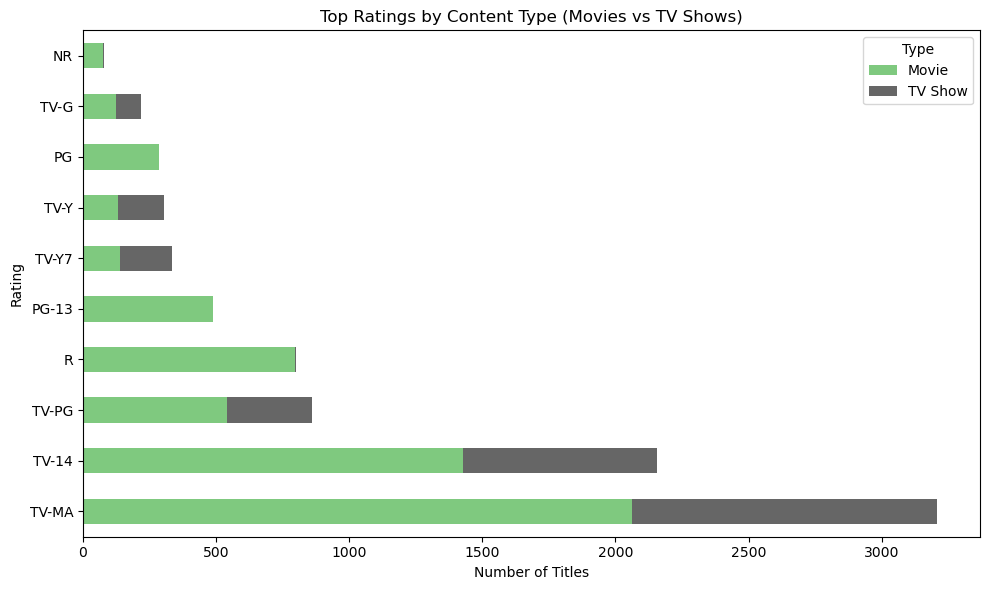

In [34]:
# Q3: Analyze Ratings by Content Type
# Group by 'rating' and 'type'
rating_by_type = df.groupby(['rating', 'type']).size().unstack().fillna(0)

# Sort by total
rating_by_type['Total'] = rating_by_type.sum(axis=1)
rating_by_type = rating_by_type.sort_values('Total', ascending=False).drop(columns='Total')

# Plot the top ratings
rating_by_type.head(10).plot(kind='barh', stacked=True, figsize=(10,6), colormap='Accent')
plt.title('Top Ratings by Content Type (Movies vs TV Shows)')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

🧾 Insight 7: Ratings by Content Type (Movies vs TV Shows)
TV-MA (Mature Audience):

    *Mostly used for TV Shows, though Movies also have significant presence.

    *This is Netflix’s most frequent rating overall — mostly for adult thrillers, dramas, and true crime shows.

TV-14:

    *Fairly balanced but slightly more common in TV Shows — targeted at teen audiences.

R and PG-13:

    *Heavily skewed toward Movies — as expected (TV shows usually don’t use these film-industry ratings).

TV-Y, TV-G, TV-Y7:

    *Almost entirely TV Shows, especially for kids' content.

NR (Not Rated):

    *Rare and mostly for Movies — likely older or indie content without formal classification.

🎯 What This Tells Us:
Netflix uses different rating standards for movies vs. TV shows:

Movies lean on MPAA ratings (PG, PG-13, R)

TV Shows follow TV-specific categories (TV-MA, TV-14, TV-Y, etc.)

🕰️ Time-based Trends

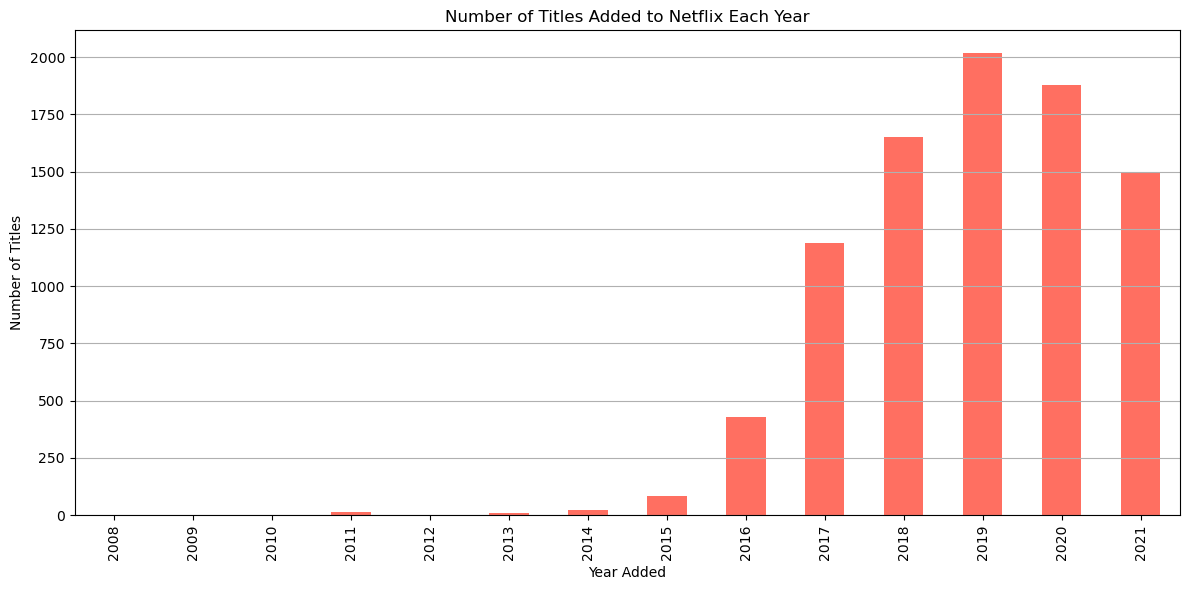

In [35]:
# Q1. Analyze Year-Month Additions
# Remove leading/trailing spaces from date strings
df['date_added'] = df['date_added'].str.strip()

# Now safely convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# Titles added each year
titles_per_year = df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
titles_per_year.plot(kind='bar', color='#FF6F61')
plt.title('Number of Titles Added to Netflix Each Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

📅 Insight 8: Titles Added to Netflix Each Year
    
    *2016 onward, there's a massive growth in content addition.

    *2019 is the peak year with over 2,000 titles added — this aligns with Netflix's aggressive expansion and original content boom.

A slight dip begins in 2020 and 2021, likely due to:

    *COVID-19 pandemic slowing production

    *More selective releases or backlog adjustments

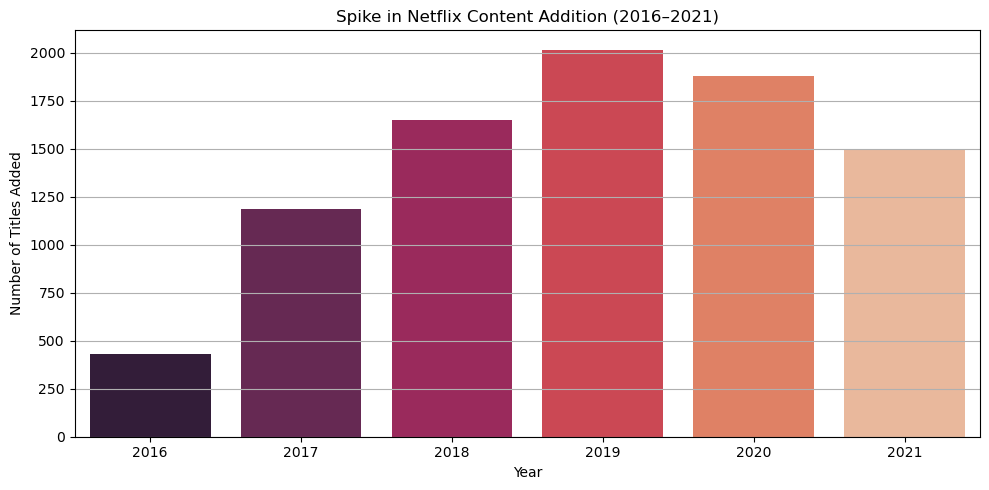

In [36]:
# Q2. Spike in Content Addition in Specific Years
# Filter for major activity years
spike_years = df[df['year_added'].between(2016, 2021)]

# Count titles per year
spike_counts = spike_years['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=spike_counts.index, y=spike_counts.values, palette='rocket')
plt.title('Spike in Netflix Content Addition (2016–2021)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

🕰️ Insight 9: Spike in Netflix Content Addition (2016–2021)
    2016 marks the start of Netflix’s global content expansion.

A sharp growth follows through:

    📈 2017: Over 1,100 titles added

    📈 2018: Nearly 1,600

    📈 2019: Peak with 2,030+ titles — Netflix’s biggest content boost

Slight decline in 2020 & 2021, likely due to:

   * COVID-19’s impact on global production

   * Strategic shift toward quality over quantity

🌍 Geographic Analysis

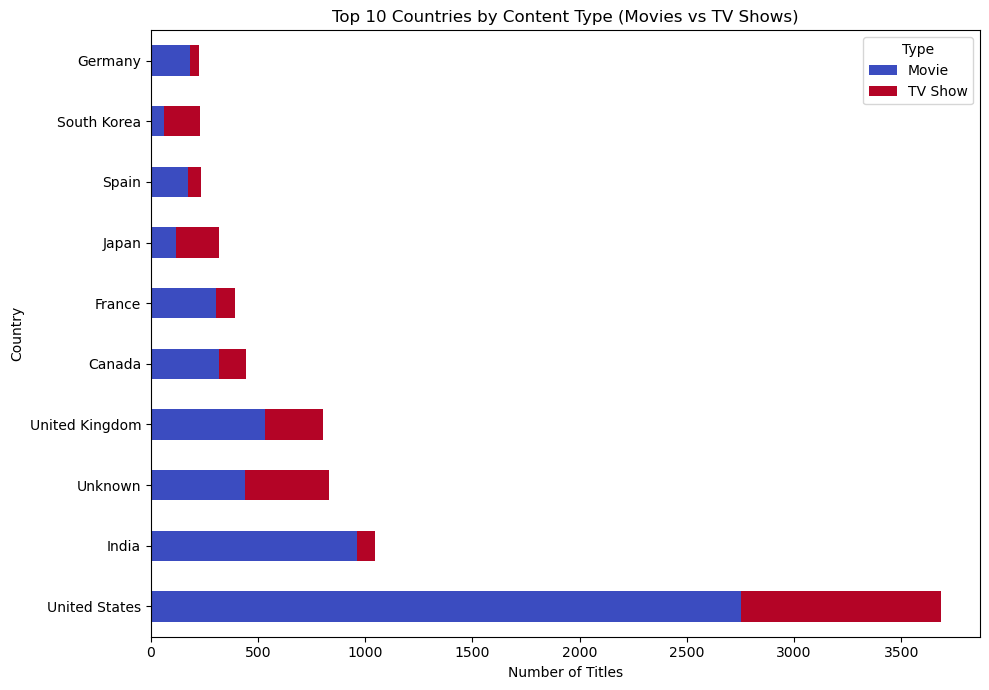

In [37]:
# Q1. Compare Countries by Content Type
# Split and explode the country column
country_split = df.copy()
country_split['country'] = country_split['country'].str.split(', ')
country_split = country_split.explode('country')

# Group by country and type
country_type = country_split.groupby(['country', 'type']).size().unstack().fillna(0)

# Sort by total content per country
country_type['Total'] = country_type.sum(axis=1)
top_countries_by_type = country_type.sort_values('Total', ascending=False).drop(columns='Total').head(10)

# Plot
top_countries_by_type.plot(kind='barh', stacked=True, figsize=(10,7), colormap='coolwarm')
plt.title('Top 10 Countries by Content Type (Movies vs TV Shows)')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

In [38]:
🌍 Insight 10: Country-wise Breakdown by Content Type

    *United States is the top content provider on Netflix, with a heavy dominance in both Movies and TV Shows — but especially TV Shows (visible by the strong red bar).

    *India is the next major contributor, producing mostly Movies with a smaller share of TV Shows.

    *United Kingdom, Canada, and France show more balance between the two formats.

    *Japan and South Korea contribute a significant number of TV Shows — likely due to the popularity of anime and K-dramas.

    *Unknown reflects titles with missing or multi-country production data — you handled this well by cleaning earlier.

💡 What This Tells Us:
Netflix's content acquisition and production is:

    USA-heavy, with rich long-format TV content

    Asia-inclusive, especially Korea, Japan, and India for regional flavor

    European-balanced, offering drama/documentary blends from UK, France, Spain

SyntaxError: invalid character '🌍' (U+1F30D) (1426646536.py, line 1)